# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Importing Modules 
import os
import csv
import matplotlib as matplot
import json 
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from api_keys import weather_api_key

#Importing City Cordinate Library 
from citipy import citipy

## Generate Cities List

In [2]:
#Defining variables as lists 
city_list = []
cordinates = []

#Making a random list of 600 cities 
np.random.seed(14949)

#Picking numbers within the range of latitudes 
lat = np.random.randint(-90, 90, size = 1700)

#Picking numbers within the range of longitudes  
long = np.random.randint(-180, 180, size = 1700)

#Putting the coridnates together 
cordinates = zip(lat, long)


for cordinates in cordinates: 
    city = citipy.nearest_city(cordinates[0], cordinates[1]).city_name
    
    if city not in city_list:
        city_list.append(city)

len(city_list)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Setting variables equal to a list 
name_list = []
temp_list  = []
hum_list = []
cloud_list = []
wind_speed_list = []
lat_list = []
lon_list = []
country_list = []
date_list = []

#Setting the counter equal to a number 
counter = 1

#Setting the correct url and bulding the query url 
url =  'http://api.openweathermap.org/data/2.5/weather?'

print(f'Beginning Data Retrival')
print('----------------------------------')

#Making a for loop to get the elements for each city
for city in city_list:
    try:
        query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
        weather_response = requests.get(query_url)
        weather_data = weather_response.json()
        
        #Making a list of all the elements needed for the Data Frame 
        name_list.append(weather_data['name'])
        temp_list.append(weather_data['main']['temp_max'])
        hum_list.append(weather_data['main']['humidity'])
        cloud_list.append(weather_data['clouds']['all'])
        wind_speed_list.append(weather_data['wind']['speed'])
        lat_list.append(weather_data['coord']['lat'])
        lon_list.append(weather_data['coord']['lon'])
        country_list.append(weather_data['sys']['country'])
        date_list.append(weather_data['dt'])

        #Print the number of the city and the city name 
        print(f'Processing Record {counter}|{city}')
        
    #Continuing to run even if the city is not found 
    except KeyError:
        
        #Printing the name of the city that does not exist on the open weather api
        print(f'{counter} does not exist... Let''s skip it')
    
    #Adding one to the counter 
    counter +=1

Beginning Data Retrival
----------------------------------
Processing Record 1|martyush
Processing Record 2|la ronge
Processing Record 3|laguna
Processing Record 4|ajaccio
Processing Record 5|srednekolymsk
Processing Record 6|kodiak
Processing Record 7|saldanha
Processing Record 8|west bay
Processing Record 9|albany
Processing Record 10|georgetown
Processing Record 11|utevka
Processing Record 12|punta arenas
Processing Record 13|berlevag
Processing Record 14|carnarvon
Processing Record 15|port alfred
Processing Record 16|bredasdorp
Processing Record 17|kapaa
Processing Record 18|pingxiang
Processing Record 19|cerinza
Processing Record 20|gerash
Processing Record 21|kathmandu
22 does not exist... Lets skip it
Processing Record 23|rikitea
24 does not exist... Lets skip it
Processing Record 25|bandarbeyla
26 does not exist... Lets skip it
Processing Record 27|kysyl-syr
Processing Record 28|kaitangata
Processing Record 29|hermanus
Processing Record 30|codajas
Processing Record 31|mataura
P

Processing Record 263|bubaque
Processing Record 264|basco
Processing Record 265|mount isa
Processing Record 266|caluquembe
Processing Record 267|shintomi
Processing Record 268|pisco
Processing Record 269|jamestown
Processing Record 270|tiksi
Processing Record 271|victoria
Processing Record 272|etla
Processing Record 273|codrington
Processing Record 274|purranque
Processing Record 275|tilichiki
Processing Record 276|paramonga
Processing Record 277|tezu
Processing Record 278|genhe
Processing Record 279|aykhal
Processing Record 280|ola
Processing Record 281|buncrana
Processing Record 282|kerema
Processing Record 283|saint anthony
Processing Record 284|namibe
Processing Record 285|yinchuan
Processing Record 286|erzin
Processing Record 287|ambon
Processing Record 288|lumut
Processing Record 289|murray
Processing Record 290|mingguang
Processing Record 291|carutapera
Processing Record 292|umm lajj
Processing Record 293|poronaysk
Processing Record 294|wuzhou
295 does not exist... Lets skip it


Processing Record 526|khirkiya
Processing Record 527|nishihara
Processing Record 528|morant bay
Processing Record 529|umm kaddadah
Processing Record 530|williamsport
Processing Record 531|yar-sale
Processing Record 532|ixtapa
533 does not exist... Lets skip it
Processing Record 534|cravo norte
Processing Record 535|quatre cocos
536 does not exist... Lets skip it
Processing Record 537|mirandola
Processing Record 538|machico
539 does not exist... Lets skip it
Processing Record 540|nanortalik
Processing Record 541|yaan
Processing Record 542|bukama
Processing Record 543|lyngseidet
Processing Record 544|pudozh
Processing Record 545|beyneu
Processing Record 546|santa catarina de tepehuanes
Processing Record 547|carahue
Processing Record 548|hamilton
549 does not exist... Lets skip it
Processing Record 550|mahibadhoo
Processing Record 551|lorengau
Processing Record 552|tanete
553 does not exist... Lets skip it
Processing Record 554|roebourne
Processing Record 555|vao
Processing Record 556|ois

In [12]:
#Making the city data into a dictionary
city_data = {'City':name_list,
        'Temperature °F':temp_list,
        'Humidity':hum_list,
        'Cloudiness':cloud_list,
        'Wind Speed':wind_speed_list,
        'Latitude':lat_list,
        'Longitude':lon_list,
        'Country':country_list,
        'Date':date_list}

#Converting into a data frame 
city_data_pd = pd.DataFrame(city_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Displaing the data frame 
city_data_pd

,City,Temperature °F,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country,Date
0,Martyush,43.21,92,3,7.02,56.40,61.88,RU,1601259577
1,La Ronge,48.20,66,90,9.17,55.10,-105.28,CA,1601259577
2,Laguna,86.00,30,1,5.48,38.42,-121.42,US,1601259577
3,Arrondissement d'Ajaccio,53.60,93,100,4.70,42.00,8.92,FR,1601259578
4,Srednekolymsk,52.52,43,60,10.36,67.45,153.68,RU,1601259129
...,...,...,...,...,...,...,...,...,...
592,Sokoni,75.20,94,75,10.33,-6.43,39.55,TZ,1601259737
593,Corinth,66.20,77,20,1.81,37.94,22.96,GR,1601259566
594,Betlitsa,51.64,93,100,12.97,54.01,33.96,RU,1601259738
595,Seoul,71.60,64,1,0.27,37.57,126.98,KR,1601259631


In [14]:
city_data_pd.to_csv('city_data_frame.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#No data where the humidity > 100%
city_data_pd.loc[city_data_pd['Humidity']>100]

,City,Temperature °F,Humidity,Cloudiness,Wind Speed,Latitude,Longitude


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

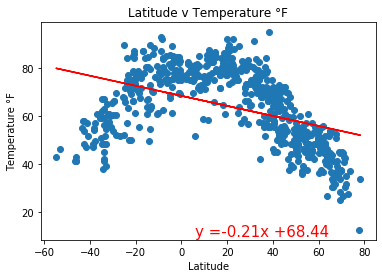

In [12]:
#Setting the x and y values 
x_values = city_data_pd['Latitude']
y_values = city_data_pd['Temperature °F']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Temperature °F')
plt.title('Latitude v Temperature °F')
plt.savefig('Latitude v Temperature °F.png')

## Latitude vs. Humidity Plot

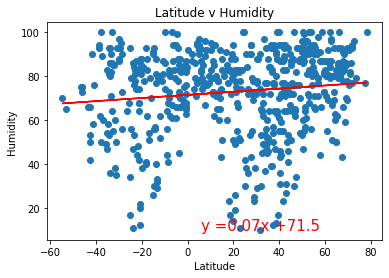

In [13]:
#Setting the x and y values 
x_values = city_data_pd['Latitude']
y_values = city_data_pd['Humidity']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude v Humidity')
plt.savefig('Latitude v Humidity.png')

## Latitude vs. Cloudiness Plot

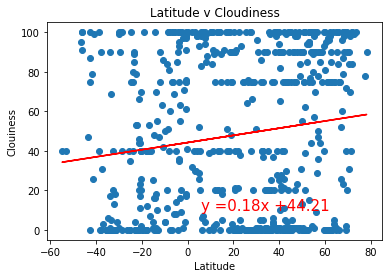

In [14]:
#Setting the x and y values 
x_values = city_data_pd['Latitude']
y_values = city_data_pd['Cloudiness']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Clouiness')
plt.title('Latitude v Cloudiness')
plt.savefig('Latitude v Cloudiness.png')

## Latitude vs. Wind Speed Plot

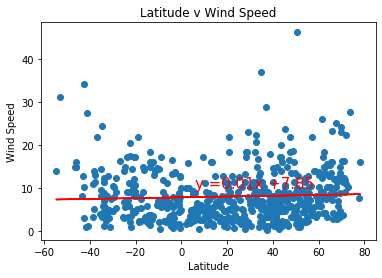

In [15]:
#Setting the x and y values 
x_values = city_data_pd['Latitude']
y_values = city_data_pd['Wind Speed']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude v Wind Speed')
plt.savefig('Latitude v Wind Speed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

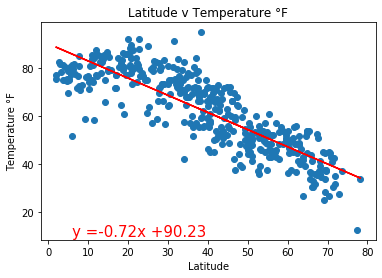

In [16]:
#Filtering only the northern hemisphere data 
north_hem_pd = city_data_pd.loc[city_data_pd['Latitude']>=0]

#Setting the x and y values 
x_values = north_hem_pd['Latitude']
y_values = north_hem_pd['Temperature °F']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Temperature °F')
plt.title('Latitude v Temperature °F')
plt.savefig('Latitude v Temperature °F (N).png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

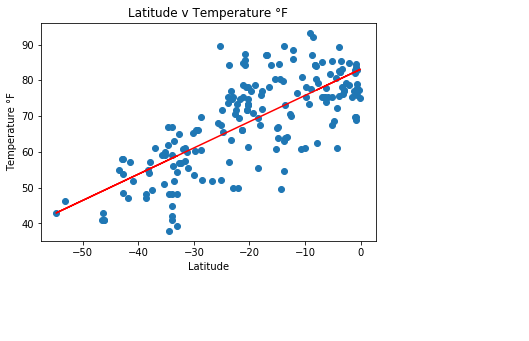

In [17]:
#Filtering only the southern hemisphere data 
south_hem_pd = city_data_pd.loc[city_data_pd['Latitude']<0]

#Setting the x and y values 
x_values = south_hem_pd['Latitude']
y_values = south_hem_pd['Temperature °F']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Temperature °F')
plt.title('Latitude v Temperature °F')
plt.savefig('Latitude v Temperature °F (S).png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

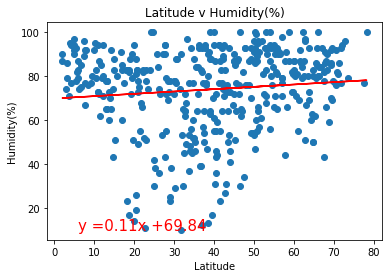

In [18]:
#Setting the x and y values 
x_values = north_hem_pd['Latitude']
y_values = north_hem_pd['Humidity']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude v Humidity(%)')
plt.savefig('Latitude v Humidity(%)(N).png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

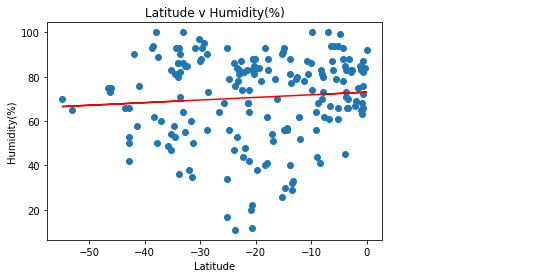

In [19]:
#Setting the x and y values 
x_values = south_hem_pd['Latitude']
y_values = south_hem_pd['Humidity']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude v Humidity(%)')
plt.savefig('Latitude v Humidity(%)(S).png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

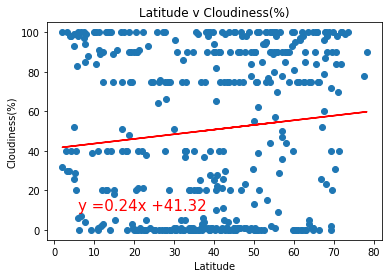

In [20]:
#Setting the x and y values 
x_values = north_hem_pd['Latitude']
y_values = north_hem_pd['Cloudiness']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude v Cloudiness(%)')
plt.savefig('Latitude v Cloudiness(%)(N).png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

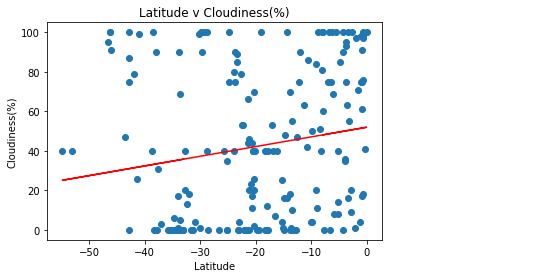

In [21]:
#Setting the x and y values 
x_values = south_hem_pd['Latitude']
y_values = south_hem_pd['Cloudiness']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude v Cloudiness(%)')
plt.savefig('Latitude v Cloudiness(%)(S).png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

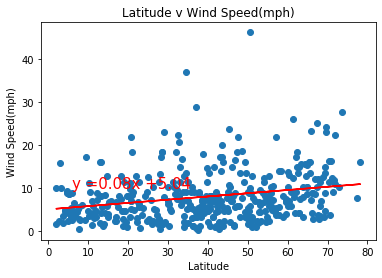

In [22]:
#Setting the x and y values 
x_values = north_hem_pd['Latitude']
y_values = north_hem_pd['Wind Speed']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Latitude v Wind Speed(mph)')
plt.savefig('Latitude v Wind Speed(mph)(N).png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

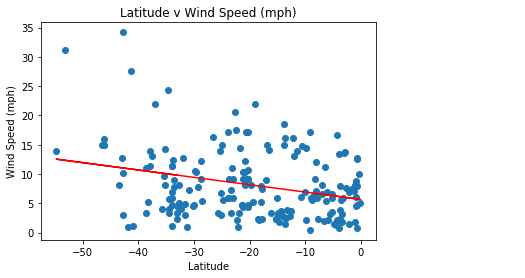

In [23]:
#Setting the x and y values 
x_values = south_hem_pd['Latitude']
y_values = south_hem_pd['Wind Speed']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude v Wind Speed (mph)')
plt.savefig('Latitude v Wind Speed(mph)(S).png')